In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import squarify

In [2]:
ROOT_PATH = '..'
DATA_PATH = ROOT_PATH + '/data/'

In [171]:
import configparser

parser = configparser.ConfigParser()
parser.read("../models/config.txt")

pd.read_pickle(parser['path']['transactions_dataset'])

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015


In [6]:
# transactions = pd.read_csv(DATA_PATH + 'transactions_dataset.csv', sep=';')
# transactions['date_order'] = pd.to_datetime(transactions['date_order'], format='%Y-%m-%d')
# transactions['date_invoice'] = pd.to_datetime(transactions['date_invoice'], format='%Y-%m-%d')
# print(transactions.shape)
# transactions.head(10)

In [5]:
# transactions.to_pickle(DATA_PATH + 'transactions_dataset.pickle')
transactions = pd.read_pickle(DATA_PATH + 'transactions_dataset.pickle')
transactions

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015


## Exploration

In [5]:
transactions.product_id.nunique()

607418

In [6]:
transactions.client_id.nunique()

170589

In [7]:
transactions.branch_id.nunique()

582

In [66]:
(transactions.sales_net < 0).sum() / len(transactions)

0.03766533166064731

In [6]:
transactions.describe(include='all', datetime_is_numeric=True)

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
count,63319315,63319314,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07,63319315,6.331932e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,at the store,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,32114196,NaN
mean,2018-09-21 04:04:39.664808448,2018-09-26 05:22:19.385416448,1.632321e+06,1.139833e+06,1.479416e+02,9.215658e+01,NaN,5.466714e+03
min,2017-09-22 00:00:00,2016-10-12 00:00:00,1.500000e+01,6.000000e+00,-1.738817e+06,3.000000e+00,NaN,2.000000e+01
25%,2018-03-19 00:00:00,2018-03-22 00:00:00,8.517370e+05,5.658470e+05,1.414653e+01,3.000000e+00,NaN,2.907000e+03
50%,2018-09-21 00:00:00,2018-09-27 00:00:00,1.621731e+06,1.152241e+06,4.424280e+01,5.000000e+00,NaN,5.226000e+03
75%,2019-03-21 00:00:00,2019-03-26 00:00:00,2.434262e+06,1.706977e+06,1.314680e+02,2.100000e+01,NaN,8.361000e+03
max,2019-09-22 00:00:00,2021-07-13 00:00:00,3.238833e+06,2.274517e+06,1.740456e+06,1.980010e+05,NaN,1.105700e+04


In [8]:
transactions.columns

Index(['date_order', 'date_invoice', 'product_id', 'client_id', 'sales_net',
       'quantity', 'order_channel', 'branch_id'],
      dtype='object')

# 1) KMeans with 5 homemade features

### Preprocessing

In [37]:
# Create clients
clients = transactions[['client_id', 'date_order', 'sales_net', 'quantity']].groupby('client_id').agg({'sales_net': ['sum', 'mean'], 'quantity': ['sum', 'mean', 'count'], 'date_order': ['min', 'max']})
clients.reset_index(inplace=True)
clients.columns = ['_'.join(col).strip() for col in clients.columns.values]
clients.rename(columns={'client_id_': 'client_id', 'quantity_count': 'nb_orders'}, inplace=True)
clients

,client_id,sales_net_sum,sales_net_mean,quantity_sum,quantity_mean,nb_orders,date_order_min,date_order_max
0,6,5.882233e+03,147.055825,3038,75.950000,40,2017-10-27,2019-08-13
1,7,1.190777e+03,79.385139,99,6.600000,15,2018-07-16,2018-12-24
2,14,3.103187e+06,243.158351,1392564,109.118007,12762,2017-09-25,2019-09-20
3,18,2.194882e+05,98.690724,72612,32.649281,2224,2017-09-26,2019-09-12
4,25,3.745861e+02,93.646524,108,27.000000,4,2018-10-10,2018-10-10
...,...,...,...,...,...,...,...,...
170584,2274456,1.542821e+03,70.128209,776,35.272727,22,2019-08-26,2019-09-02
170585,2274479,4.186966e+02,41.869660,40,4.000000,10,2017-10-30,2019-02-27
170586,2274504,1.132566e+02,28.314150,14,3.500000,4,2017-11-02,2019-01-01
170587,2274508,0.000000e+00,0.000000,228,28.500000,8,2017-10-18,2017-10-18


In [38]:
# Remove negative sales from nb orders
negative_sales_by_clients = transactions[transactions['sales_net'] < 0][['client_id', 'sales_net']].groupby('client_id').count().reset_index()
clients_temp = pd.merge(left=clients, right=negative_sales_by_clients, on='client_id', how='left').fillna(0)
clients.nb_orders = (clients_temp['nb_orders'] - clients_temp['sales_net']).astype(int)

In [39]:
# Add temporal informations
from datetime import datetime
clients['days_range'] = (clients.date_order_max - clients.date_order_min).dt.days
clients['days_since_last_order'] = (datetime(2019, 9, 1) - clients.date_order_max).dt.days.apply(lambda x: max([0, x]))
clients

,client_id,sales_net_sum,sales_net_mean,quantity_sum,quantity_mean,nb_orders,date_order_min,date_order_max,days_range,days_since_last_order
0,6,5.882233e+03,147.055825,3038,75.950000,40,2017-10-27,2019-08-13,655,19
1,7,1.190777e+03,79.385139,99,6.600000,15,2018-07-16,2018-12-24,161,251
2,14,3.103187e+06,243.158351,1392564,109.118007,12689,2017-09-25,2019-09-20,725,0
3,18,2.194882e+05,98.690724,72612,32.649281,2076,2017-09-26,2019-09-12,716,0
4,25,3.745861e+02,93.646524,108,27.000000,4,2018-10-10,2018-10-10,0,326
...,...,...,...,...,...,...,...,...,...,...
170584,2274456,1.542821e+03,70.128209,776,35.272727,22,2019-08-26,2019-09-02,7,0
170585,2274479,4.186966e+02,41.869660,40,4.000000,8,2017-10-30,2019-02-27,485,186
170586,2274504,1.132566e+02,28.314150,14,3.500000,4,2017-11-02,2019-01-01,425,243
170587,2274508,0.000000e+00,0.000000,228,28.500000,4,2017-10-18,2017-10-18,0,683


In [40]:
# Filter out some clients based on rules
clients = clients[clients.sales_net_sum > 0]

In [41]:
clients_to_cluster = pd.DataFrame(index=clients.index)
clients_to_cluster['monetary_value'] = np.log(clients.sales_net_sum + 1)
clients_to_cluster['frequency_ratio'] = clients.nb_orders.div(clients.days_range).replace(np.inf, 0)
clients_to_cluster['frequency_nb_orders'] = np.log(clients.nb_orders + 1)
clients_to_cluster['recency'] = np.log(clients.days_since_last_order + 1)
clients_to_cluster['age'] = np.log(clients.days_range + 1)
clients_to_cluster['client_id'] = clients.client_id
clients_to_cluster.set_index('client_id', drop=True, inplace=True)
clients_to_cluster

,monetary_value,frequency_ratio,frequency_nb_orders,recency,age
client_id,,,,,
6,8.679862,0.061069,3.713572,2.995732,6.486161
7,7.083201,0.093168,2.772589,5.529429,5.087596
14,14.947940,17.502069,9.448570,0.000000,6.587550
18,12.299058,2.899441,7.638680,0.000000,6.575076
25,5.928488,0.000000,1.609438,5.789960,0.000000
...,...,...,...,...,...
2274440,9.907169,0.148459,4.672829,0.000000,6.572283
2274456,7.342016,3.142857,3.135494,0.000000,2.079442
2274479,6.039532,0.016495,2.197225,5.231109,6.186209


In [42]:
clients_to_cluster.describe()

,monetary_value,frequency_ratio,frequency_nb_orders,recency,age
count,1.681940e+05,168194.000000,168194.000000,168194.000000,168194.000000
mean,8.736925e+00,0.683008,4.012004,2.919967,5.231795
std,2.256785e+00,2.317489,1.923569,2.483825,2.122993
min,2.220446e-16,0.000000,0.693147,0.000000,0.000000
25%,7.227703e+00,0.041475,2.564949,0.000000,5.135798
50%,8.765690e+00,0.142857,3.912023,3.258097,6.276643
75%,1.031118e+01,0.497908,5.351858,5.347108,6.541030
max,1.713183e+01,278.500000,11.567319,6.561031,6.593045


### Clustering

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [44]:
# Scale the data
data = clients_to_cluster.to_numpy()
data_scaled = StandardScaler().fit_transform(data)
data_scaled

array([[-0.02528509, -0.26836853, -0.15514548,  0.03050355,  0.59084954],
       [-0.73278071, -0.25451772, -0.64433314,  1.05058508, -0.06792251],
       [ 2.75216018,  7.25747232,  2.82629944, -1.17559624,  0.63860736],
       ...,
       [-1.19524025, -0.28760228, -0.94344687,  0.93047947,  0.44956174],
       [-1.7717635 , -0.29065865, -1.24901868,  1.03759667,  0.38749387],
       [ 0.4490249 , -0.24388187,  0.21150147, -0.61746581,  0.61940583]])

In [45]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data_scaled)
    kmeanModel.fit(data_scaled)
  
    distortions.append(sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(data_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

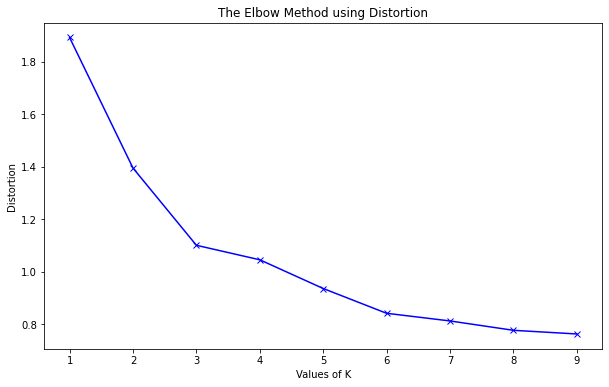

In [46]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

In [48]:
kmeans.labels_

array([2, 2, 0, ..., 2, 2, 0], dtype=int32)

In [49]:
data_with_clusters = pd.DataFrame(data_scaled, columns=clients_to_cluster.columns, index=clients_to_cluster.index)
data_with_clusters['label'] = kmeans.labels_
data_with_clusters

,monetary_value,frequency_ratio,frequency_nb_orders,recency,age,label
client_id,,,,,,
6,-0.025285,-0.268369,-0.155145,0.030504,0.590850,2
7,-0.732781,-0.254518,-0.644333,1.050585,-0.067923,2
14,2.752160,7.257472,2.826299,-1.175596,0.638607,0
18,1.578415,0.956397,1.885395,-1.175596,0.632732,0
25,-1.244445,-0.294720,-1.249019,1.155476,-2.464356,1
...,...,...,...,...,...,...
2274440,0.518546,-0.230659,0.343542,-1.175596,0.631416,0
2274456,-0.618097,1.061432,-0.455670,-1.175596,-1.484867,2
2274479,-1.195240,-0.287602,-0.943447,0.930479,0.449562,2


In [50]:
clusters_analysis = data_with_clusters.groupby('label').mean()

In [51]:
clusters_to_plot = clusters_analysis.reset_index().melt(id_vars=['label'])
clusters_to_plot

,label,variable,value
0,0,monetary_value,0.913605
1,1,monetary_value,-1.331236
2,2,monetary_value,-0.324295
3,0,frequency_ratio,0.306114
4,1,frequency_ratio,-0.103439
5,2,frequency_ratio,-0.218604
6,0,frequency_nb_orders,0.969374
7,1,frequency_nb_orders,-1.326820
8,2,frequency_nb_orders,-0.371586
9,0,recency,-0.968923


In [53]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

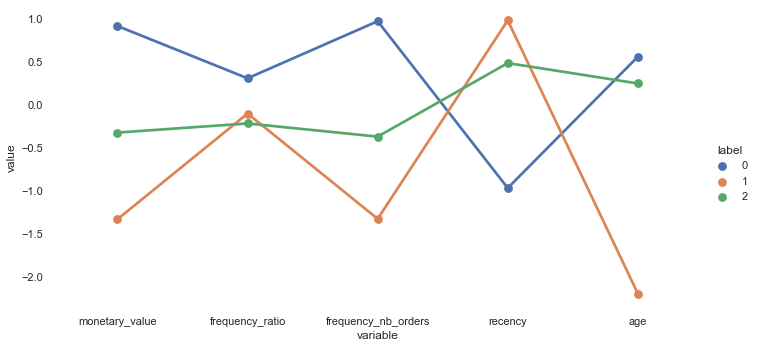

In [55]:
sns.catplot(x='variable', y='value', hue='label', data=clusters_to_plot, kind='point', height=5, aspect=2);

# 2) RFM Approach

## Preprocessing

In [101]:
agg_dict1 = {
    'product_id': 'count',
    'date_order': 'max',
    'sales_net': 'sum'
}

df_rfm = transactions.groupby('client_id').agg(agg_dict1).reset_index()
df_rfm.columns = ['client_id', 'frequency', 'max_date', 'monetary']
max_date = transactions.date_order.max()
df_rfm['recency'] = (max_date - df_rfm['max_date']).dt.days
df_rfm.drop(['max_date'], axis=1, inplace=True)
df_rfm

,client_id,frequency,monetary,recency
0,6,40,5.882233e+03,40
1,7,15,1.190777e+03,272
2,14,12762,3.103187e+06,2
3,18,2224,2.194882e+05,10
4,25,4,3.745861e+02,347
...,...,...,...,...
170584,2274456,22,1.542821e+03,20
170585,2274479,10,4.186966e+02,207
170586,2274504,4,1.132566e+02,264
170587,2274508,8,0.000000e+00,704


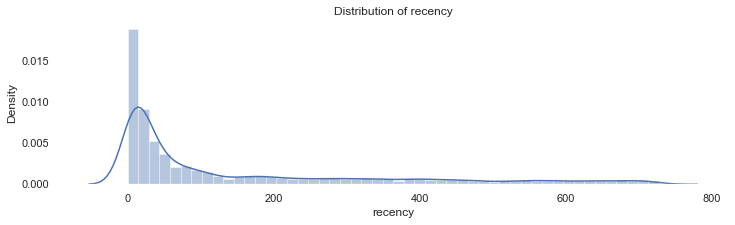

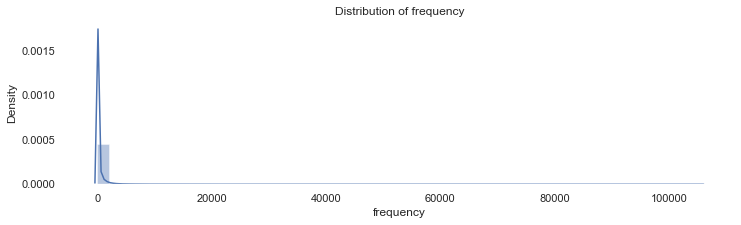

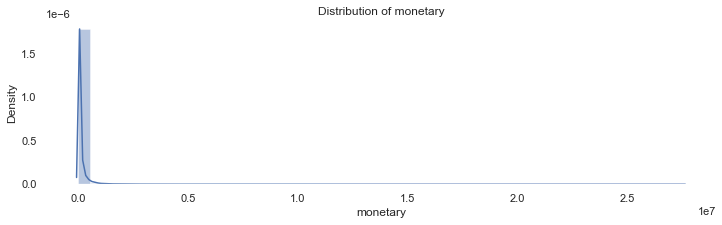

In [102]:
# Visualize distributions of the 3 features
rfm_features = ['recency', 'frequency', 'monetary']

for col in rfm_features:
    fig, ax = plt.subplots(figsize=(12,3), facecolor='white')
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [103]:
# Compose by logarithm to scale huge values
df_rfm['frequency'] = np.log(df_rfm['frequency'] + 1)
df_rfm['monetary'] = np.log(df_rfm['monetary'] + 1).fillna(0)
df_rfm['recency'] = np.log(df_rfm['recency'] + 1).max() - np.log(df_rfm['recency'] + 1)
df_rfm

/Users/camilleepitalon/miniconda3/envs/DS/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,client_id,frequency,monetary,recency
0,6,3.713572,8.679862,2.876729
1,7,2.772589,7.083201,0.980829
2,14,9.454306,14.947940,5.491689
3,18,7.707512,12.299058,4.192406
4,25,1.609438,5.928488,0.738099
...,...,...,...,...
170584,2274456,3.135494,7.342016,3.545779
170585,2274479,2.397895,6.039532,1.252763
170586,2274504,1.609438,4.738447,1.010571
170587,2274508,2.197225,0.000000,0.032103


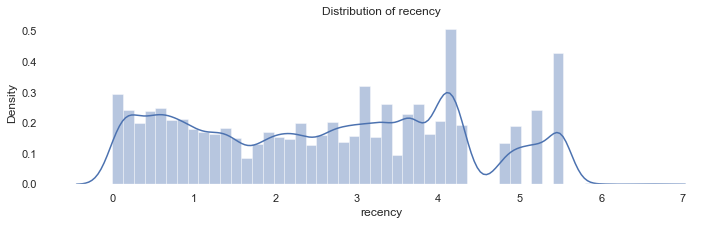

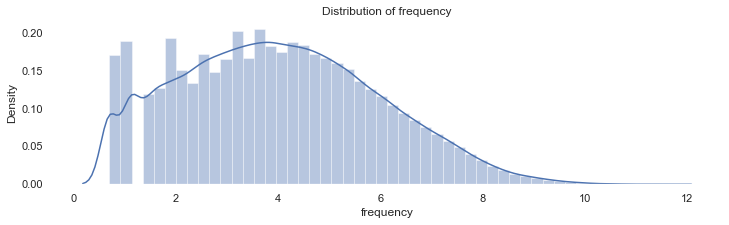

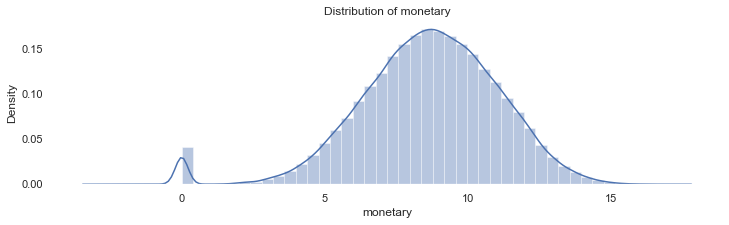

In [104]:
# Visualize distributions of the 3 scaled features
rfm_features = ['recency', 'frequency', 'monetary']

for col in rfm_features:
    fig, ax = plt.subplots(figsize=(12,3), facecolor='white')
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

## 2) a) KMeans

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [106]:
# Scale the data
data = df_rfm[rfm_features].to_numpy()
X = StandardScaler().fit_transform(data)
X

array([[ 0.15128599, -0.15987025,  0.02664875],
       [-1.00877072, -0.64682845, -0.62086761],
       [ 1.75131873,  2.81095523,  2.56863096],
       ...,
       [-0.9905723 , -1.24875815, -1.57176872],
       [-1.58927397, -0.94457898, -3.49341774],
       [ 0.45397905,  0.20510571,  0.46074823]])

In [107]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

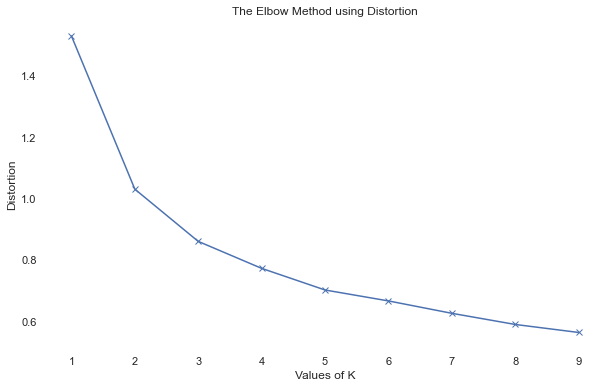

In [108]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [109]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [110]:
kmeans.labels_

array([2, 0, 1, ..., 0, 0, 2], dtype=int32)

In [111]:
df_rfm_labeled = pd.DataFrame(X, columns=rfm_features, index=df_rfm.client_id)
df_rfm_labeled['label'] = kmeans.labels_
df_rfm_labeled

,recency,frequency,monetary,label
client_id,,,,
6,0.151286,-0.159870,0.026649,2
7,-1.008771,-0.646828,-0.620868,0
14,1.751319,2.810955,2.568631,1
18,0.956318,1.906991,1.494392,1
25,-1.157292,-1.248758,-1.089155,0
...,...,...,...,...
2274456,0.560662,-0.459025,-0.515907,2
2274479,-0.842381,-0.840732,-1.044121,0
2274504,-0.990572,-1.248758,-1.571769,0


In [112]:
clusters_analysis = df_rfm_labeled.groupby('label').mean()

In [113]:
clusters_to_plot = clusters_analysis.reset_index().melt(id_vars=['label'])
clusters_to_plot

,label,variable,value
0,0,recency,-0.987747
1,1,recency,1.086177
2,2,recency,-0.005826
3,0,frequency,-1.075675
4,1,frequency,1.207138
5,2,frequency,-0.022696
6,0,monetary,-1.073752
7,1,monetary,1.070360
8,2,monetary,0.068038


In [114]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

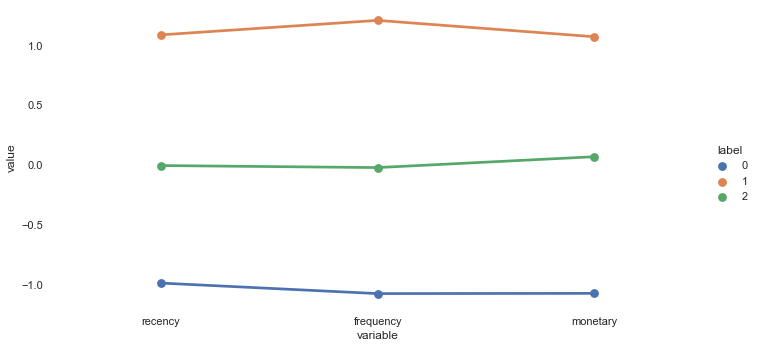

In [115]:
sns.catplot(x='variable', y='value', hue='label', data=clusters_to_plot, kind='point', height=5, aspect=2);

## 2) b) Rule-based approach

In [159]:
transactions

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015


In [160]:
agg_dict1 = {
    'product_id': 'count',
    'date_order': 'max',
    'sales_net': 'sum'
}
df_rfm = transactions.groupby('client_id').agg(agg_dict1).reset_index()
df_rfm
df_rfm.columns = ['client_id', 'frequency', 'max_date', 'monetary']
max_date = transactions.date_order.max()
df_rfm['recency'] = (max_date - df_rfm['max_date']).dt.days
df_rfm.drop(['max_date'], axis=1, inplace=True)
df_rfm

,client_id,frequency,monetary,recency
0,6,40,5.882233e+03,40
1,7,15,1.190777e+03,272
2,14,12762,3.103187e+06,2
3,18,2224,2.194882e+05,10
4,25,4,3.745861e+02,347
...,...,...,...,...
170584,2274456,22,1.542821e+03,20
170585,2274479,10,4.186966e+02,207
170586,2274504,4,1.132566e+02,264
170587,2274508,8,0.000000e+00,704


In [161]:
df_rfm['frequency'] = np.log(df_rfm['frequency'] + 1)
df_rfm['monetary'] = np.log(df_rfm['monetary'] + 1).fillna(0)
df_rfm['recency'] = np.log(df_rfm['recency'] + 1)

/Users/camilleepitalon/miniconda3/envs/DS/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [162]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q=5, labels=f_labels).astype(int)
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)

df_rfm['rfm_sum'] = df_rfm['r_score'] + df_rfm['f_score'] + df_rfm['m_score']

In [163]:
def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

In [164]:
profile_thresholds = {
    'champions': {'r':(5,5), 'f':(4,5)},
    'loyal customers': {'r':(3,4), 'f':(4,5)},
    'potential loyalist': {'r':(4,5), 'f':(2,3)},
    'new customers': {'r':(5,5), 'f':(1,1)},
    'promising': {'r':(4,4), 'f':(1,1)},
    'needing attention': {'r':(3,3), 'f':(3,3)},
    'about to sleep': {'r':(3,3), 'f':(1,2)},
    'at risk': {'r':(1,2), 'f':(3,4)},
    'cant loose them': {'r':(1,2), 'f':(5,5)},
    'hibernating': {'r':(1,2), 'f':(1,2)}
}

In [ ]:
profile_thresholds = {
    'champions': {'r':(5,5), 'f':(4,5)},
    'loyal customers': {'r':(3,4), 'f':(4,5)},
    'potential loyalist': {'r':(4,5), 'f':(2,3)},
    'new customers': {'r':(5,5), 'f':(1,1)},
    'promising': {'r':(4,4), 'f':(1,1)},
    'needing attention': {'r':(3,3), 'f':(3,3)},
    'about to sleep': {'r':(3,3), 'f':(1,2)},
    'at risk': {'r':(1,2), 'f':(3,4)},
    'cant loose them': {'r':(1,2), 'f':(5,5)},
    'hibernating': {'r':(1,2), 'f':(1,2)}
}



In [168]:
def labelize(df_rfm: pd.DataFrame, profile_thresholds:dict) -> pd.DataFrame:
    df_rfm['rfm_label'] = ''
    for k, v in profile_thresholds.items():
        df_rfm = assign_label(df_rfm, v['r'], v['f'], k)
    return df_rfm

labelize(df_rfm, profile_thresholds)

,client_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label
0,6,3.713572,8.679862,3.713572,3,3,3,9,needing attention
1,7,2.772589,7.083201,5.609472,2,2,2,6,hibernating
2,14,9.454306,14.947940,1.098612,5,5,5,15,champions
3,18,7.707512,12.299058,2.397895,5,5,5,15,champions
4,25,1.609438,5.928488,5.852202,1,1,1,3,hibernating
...,...,...,...,...,...,...,...,...,...
170584,2274456,3.135494,7.342016,3.044522,4,2,2,8,potential loyalist
170585,2274479,2.397895,6.039532,5.337538,2,2,1,5,hibernating
170586,2274504,1.609438,4.738447,5.579730,2,1,1,4,hibernating
170587,2274508,2.197225,0.000000,6.558198,1,1,1,3,hibernating


In [121]:
df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant loose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

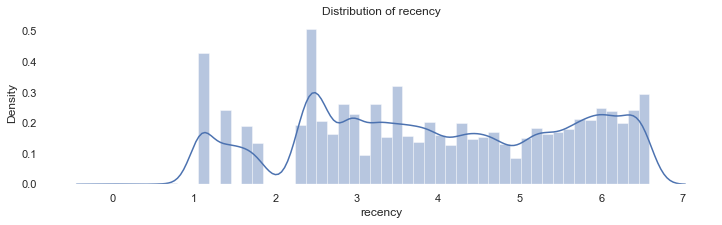

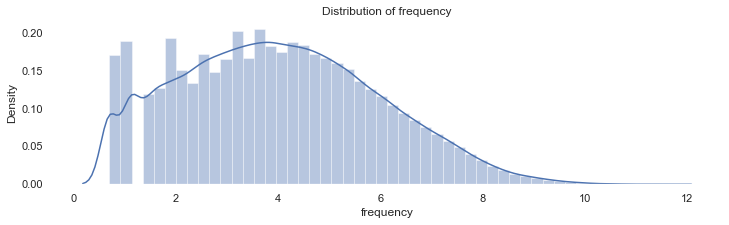

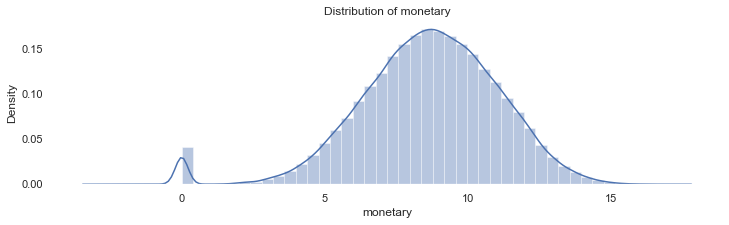

In [122]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3), facecolor='white')
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

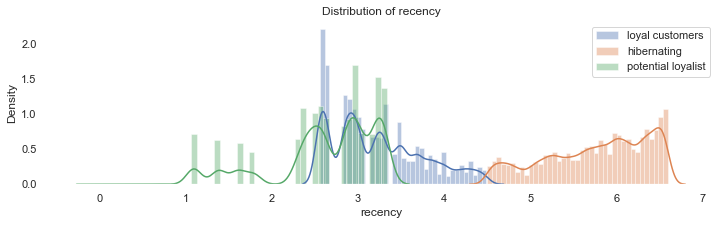

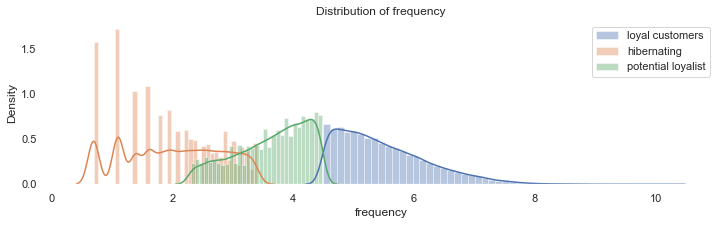

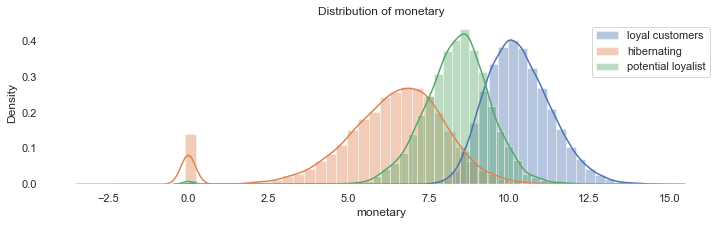

In [123]:
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3), facecolor='white')
    for segment in segments:
        sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

In [124]:
df_rfm

,client_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_sum,rfm_label
0,6,3.713572,8.679862,3.713572,3,3,3,9,needing attention
1,7,2.772589,7.083201,5.609472,2,2,2,6,hibernating
2,14,9.454306,14.947940,1.098612,5,5,5,15,champions
3,18,7.707512,12.299058,2.397895,5,5,5,15,champions
4,25,1.609438,5.928488,5.852202,1,1,1,3,hibernating
...,...,...,...,...,...,...,...,...,...
170584,2274456,3.135494,7.342016,3.044522,4,2,2,8,potential loyalist
170585,2274479,2.397895,6.039532,5.337538,2,2,1,5,hibernating
170586,2274504,1.609438,4.738447,5.579730,2,1,1,4,hibernating
170587,2274508,2.197225,0.000000,6.558198,1,1,1,3,hibernating


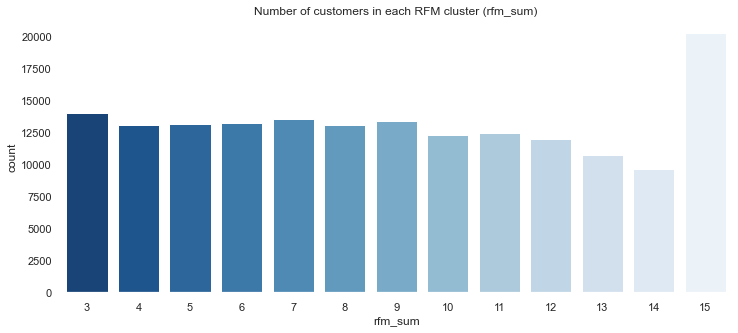

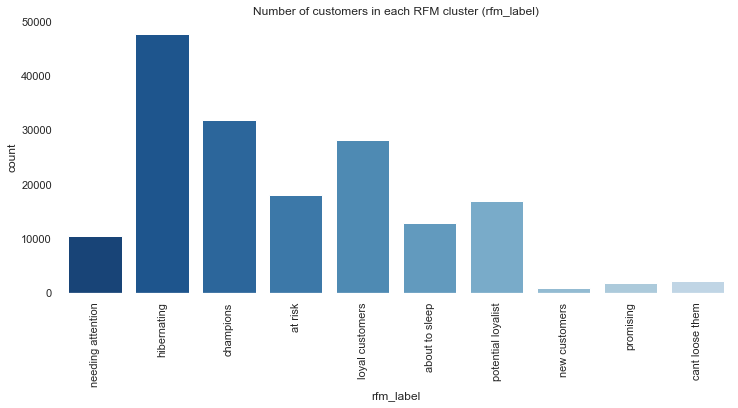

In [125]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
palette = sns.color_palette("Blues_r", n_colors=13)

for rfm_type in ['sum', 'label']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='rfm_'+rfm_type, data=df_rfm, palette=palette)
    ax.set_title('Number of customers in each RFM cluster (rfm_%s)' % rfm_type)
    if rfm_type == 'label':
        plt.xticks(rotation=90)
    plt.show()

In [126]:
agg_dict2 = {
    'client_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = df_rfm.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'client_id': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

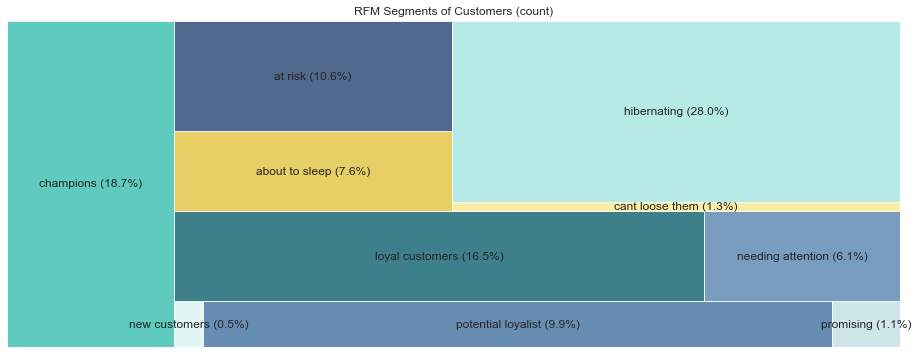

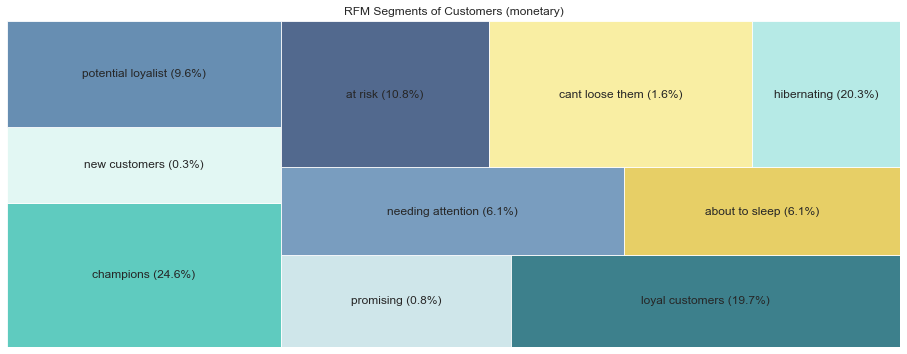

In [127]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

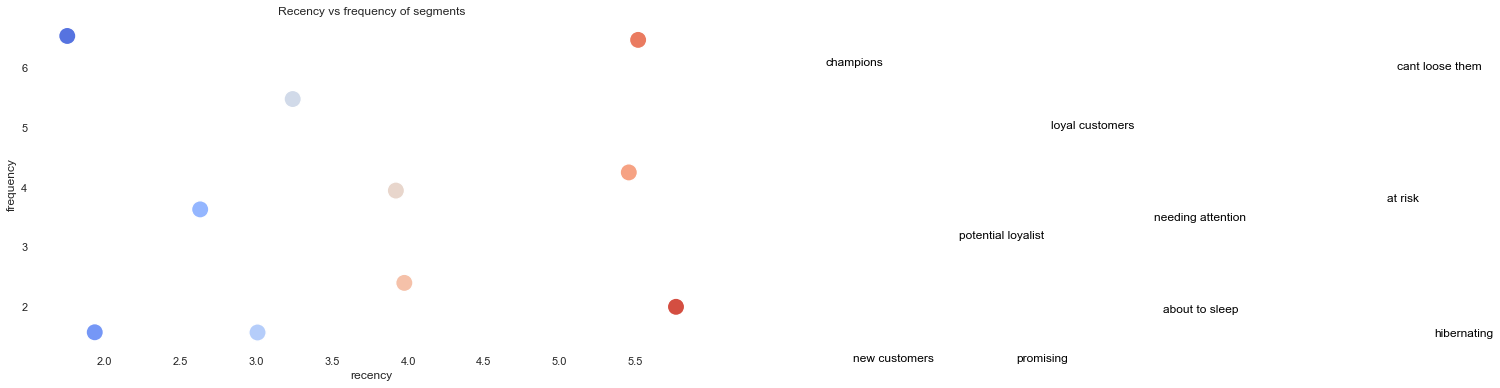

In [128]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

## Sales analysis

In [52]:
sales_by_day = transactions[['date_order', 'sales_net', 'quantity']].groupby('date_order').sum()
sales_by_day.reset_index(inplace=True)
sales_by_day

,date_order,sales_net,quantity
0,2017-09-22,4.748364e+03,570
1,2017-09-23,3.761597e+04,9544
2,2017-09-24,5.712976e+04,22644
3,2017-09-25,1.749303e+07,10714195
4,2017-09-26,1.815024e+07,11371242
...,...,...,...
726,2019-09-18,9.565972e+06,5881484
727,2019-09-19,1.014737e+07,5021328
728,2019-09-20,7.547261e+06,3562304
729,2019-09-21,5.842836e+04,27032


In [10]:
sales_by_week = sales_by_day.copy()
sales_by_week['week_order'] = sales_by_week['date_order'] - sales_by_day['date_order'].dt.weekday * np.timedelta64(1, 'D')
sales_by_week.drop(columns=['date_order'])
sales_by_week = sales_by_week.groupby("week_order").sum()
sales_by_week

,sales_net,quantity
week_order,,
2017-09-18,9.949410e+04,32758
2017-09-25,8.858272e+07,55951330
2017-10-02,9.576884e+07,60006547
2017-10-09,9.580276e+07,76547731
2017-10-16,9.280616e+07,72602845
...,...,...
2019-08-19,1.131323e+08,64833948
2019-08-26,1.082565e+08,59752122
2019-09-02,1.012958e+08,55659183


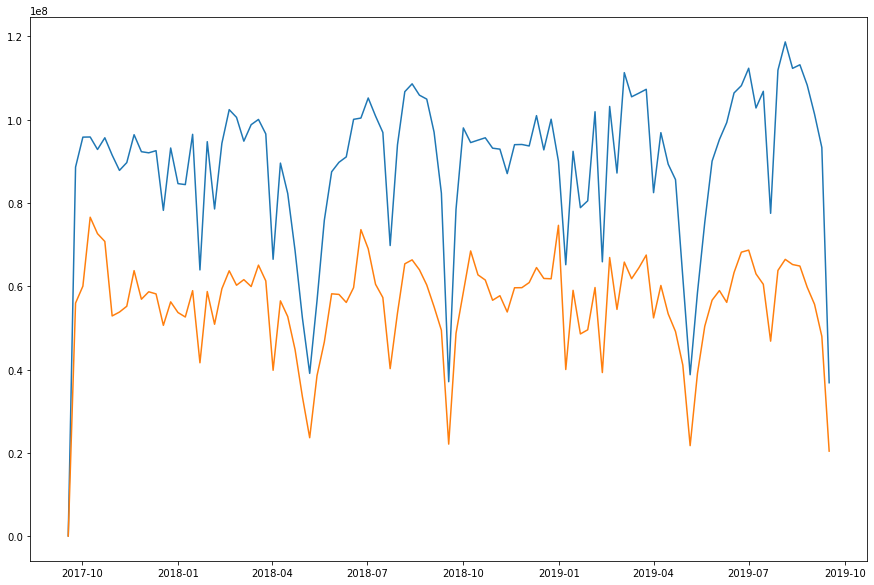

In [11]:
plt.figure(facecolor='white', figsize=(15,10))
plt.plot(sales_by_week.sales_net)
plt.plot(sales_by_week.quantity)
plt.show()

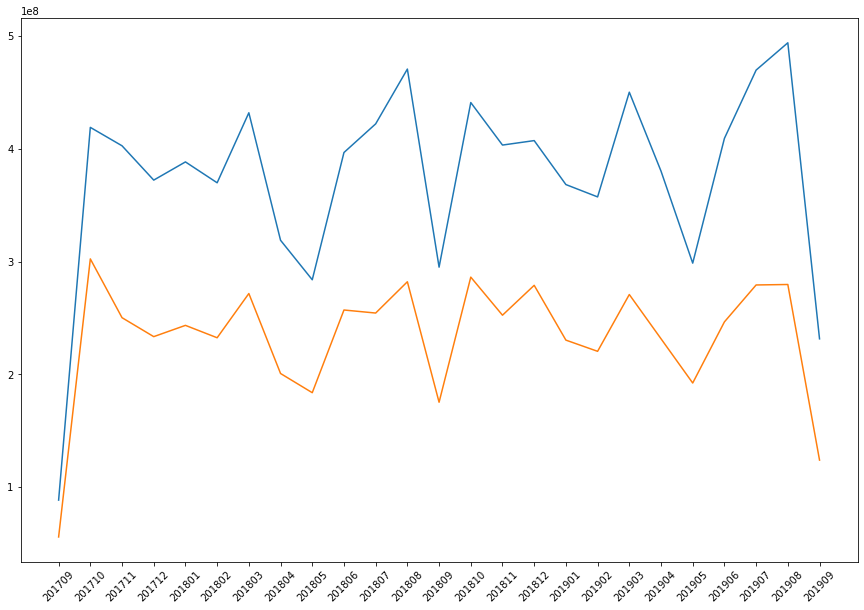

In [22]:
sales_by_month = sales_by_day.copy()
sales_by_month['month_order'] = sales_by_day['date_order'].apply(lambda x: str(x.year) + str(x.month) if len(str(x.month))==2 else str(x.year) + '0' + str(x.month))
sales_by_month.drop(columns=['date_order'])
sales_by_month = sales_by_month.groupby("month_order").sum()

plt.figure(facecolor='white', figsize=(15,10))
plt.plot(sales_by_month.sales_net)
plt.plot(sales_by_month.quantity)
plt.xticks(rotation=45)
plt.show()

In [21]:
sales_by_month

,sales_net,quantity
month_order,,
201709,8.862928e+07,55969046
201710,4.188312e+08,302317615
201711,4.025142e+08,250233470
201712,3.721120e+08,233447497
201801,3.882355e+08,243431506
201802,3.697512e+08,232455180
201803,4.317772e+08,271642534
201804,3.188098e+08,200791605
201805,2.838405e+08,183784103
